# PROJECT-1 : TWITTER SENTIMENT ANALYSIS


The following project is about analyzing the sentiments of tweets on social networking website‘Twitter’. The dataset for this project  is scraped from Twitter. It contains 1,600,000 tweetsextracted using Twitter API. It is a labeled dataset with tweets annotated with the sentiment (0 =negative,2= neutral,4 = positive)

It contains the following 6 fields:
 1. target: the polarity of the tweet (0= negative,2= neutral,4= positive)
 2. ids: The id of the tweet .
 3. date: The date of the tweet (Sat May 16 23:58:44 UTC2009)
 4. flag: The query. If there is no query, then this value is NO_QUERY.
 5. user: The user that tweeted
 6. text: The text of the tweet.

Design a classification model that correctly predicts the polarity of the tweets provided in the dataset.

### Importing Libraries and Dataset

In [5]:
! pip install contractions


[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [98]:
! pip install wordcloud

   ---------------------------------------- 0.0/300.0 kB ? eta -:--:--
   ---- ----------------------------------- 30.7/300.0 kB 1.3 MB/s eta 0:00:01
   ----------- --------------------------- 92.2/300.0 kB 871.5 kB/s eta 0:00:01
   -------------------- ------------------- 153.6/300.0 kB 1.0 MB/s eta 0:00:01
   ---------------------------------- ----- 256.0/300.0 kB 1.3 MB/s eta 0:00:01
   ---------------------------------------- 300.0/300.0 kB 1.4 MB/s eta 0:00:00



[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Importing normal libraries

In [1]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,RegexpTokenizer
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
import matplotlib.pyplot as plt
import seaborn as sns
import contractions
import re
import warnings
warnings.filterwarnings('ignore')

Importing classifier and ML-related libraries

In [19]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,precision_score,f1_score,roc_auc_score,roc_curve

In [3]:
df = pd.read_csv(r'C:\Users\aasth\OneDrive\Desktop\Guvi_Projects_Module_21\dataset\twitter_new.csv',
                 encoding='ISO-8859-1',header=None)

In [4]:
df.columns=['target','ids','date','flag','user','text']
df

,target,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
...,...,...,...,...,...,...
1599995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...


In [5]:
df['text']

0          @switchfoot http://twitpic.com/2y1zl - Awww, t...
1          is upset that he can't update his Facebook by ...
2          @Kenichan I dived many times for the ball. Man...
3            my whole body feels itchy and like its on fire 
4          @nationwideclass no, it's not behaving at all....
                                 ...                        
1599995    Just woke up. Having no school is the best fee...
1599996    TheWDB.com - Very cool to hear old Walt interv...
1599997    Are you ready for your MoJo Makeover? Ask me f...
1599998    Happy 38th Birthday to my boo of alll time!!! ...
1599999    happy #charitytuesday @theNSPCC @SparksCharity...
Name: text, Length: 1600000, dtype: object

### Text Preprocessing

In [6]:
df1=df.copy()

Removing Stop words

In [7]:
stop_words = stopwords.words('english')

In [8]:
df1['text'] = df1['text'].apply(lambda x : ' '.join([word for word in x.split() if word not in stop_words]))
df1['text']

0          @switchfoot http://twitpic.com/2y1zl - Awww, t...
1          upset can't update Facebook texting it... migh...
2          @Kenichan I dived many times ball. Managed sav...
3                           whole body feels itchy like fire
4          @nationwideclass no, behaving all. i'm mad. he...
                                 ...                        
1599995        Just woke up. Having school best feeling ever
1599996    TheWDB.com - Very cool hear old Walt interview...
1599997                 Are ready MoJo Makeover? Ask details
1599998    Happy 38th Birthday boo alll time!!! Tupac Ama...
1599999    happy #charitytuesday @theNSPCC @SparksCharity...
Name: text, Length: 1600000, dtype: object

Removing special characters

In [9]:
def remove_special_char(x):
    x = x.split()
    for i in range(0,len(x)):
        if "@" in x[i]:
            x[i]= x[i].replace("@","")
        if "#" in x[i]:
            x[i]=x[i].replace("#","")
    return ' '.join(x)

In [10]:
df1['text']= df1['text'].apply(lambda x: remove_special_char(x))
df1['text']

0          switchfoot http://twitpic.com/2y1zl - Awww, th...
1          upset can't update Facebook texting it... migh...
2          Kenichan I dived many times ball. Managed save...
3                           whole body feels itchy like fire
4          nationwideclass no, behaving all. i'm mad. her...
                                 ...                        
1599995        Just woke up. Having school best feeling ever
1599996    TheWDB.com - Very cool hear old Walt interview...
1599997                 Are ready MoJo Makeover? Ask details
1599998    Happy 38th Birthday boo alll time!!! Tupac Ama...
1599999    happy charitytuesday theNSPCC SparksCharity Sp...
Name: text, Length: 1600000, dtype: object

Removing digits

In [12]:
#The isdigit() method returns True if all characters in a string are digits. If not, it returns False
def remove_digits(x):
    x = x.split()
    for i in range(0,len(x)):
        if x[i].isdigit():
            x[i]= ""
    return ' '.join(x)

In [13]:
df1['text']=df1['text'].apply(lambda x: remove_digits(x))
df1['text']

0          switchfoot http://twitpic.com/2y1zl - Awww, th...
1          upset can't update Facebook texting it... migh...
2          Kenichan I dived many times ball. Managed save...
3                           whole body feels itchy like fire
4          nationwideclass no, behaving all. i'm mad. her...
                                 ...                        
1599995        Just woke up. Having school best feeling ever
1599996    TheWDB.com - Very cool hear old Walt interview...
1599997                 Are ready MoJo Makeover? Ask details
1599998    Happy 38th Birthday boo alll time!!! Tupac Ama...
1599999    happy charitytuesday theNSPCC SparksCharity Sp...
Name: text, Length: 1600000, dtype: object

Converting each word in tweets to lowercase

In [14]:
df1['text']=df1['text'].apply(lambda x:x.lower())
df1['text']

0          switchfoot http://twitpic.com/2y1zl - awww, th...
1          upset can't update facebook texting it... migh...
2          kenichan i dived many times ball. managed save...
3                           whole body feels itchy like fire
4          nationwideclass no, behaving all. i'm mad. her...
                                 ...                        
1599995        just woke up. having school best feeling ever
1599996    thewdb.com - very cool hear old walt interview...
1599997                 are ready mojo makeover? ask details
1599998    happy 38th birthday boo alll time!!! tupac ama...
1599999    happy charitytuesday thenspcc sparkscharity sp...
Name: text, Length: 1600000, dtype: object

Expanding the contractions

In [15]:
def expand_contractions(x):
    x = x.split()
    for i in range(0,len(x)):
        x[i] = contractions.fix(x[i])
    return ' '.join(x)

In [16]:
import contractions
print(contractions.fix("you've"))
print(contractions.fix("he's"))

you have
he is


In [17]:
df1['text'] = df1['text'].apply(lambda x:expand_contractions(x))
df1['text']

0          switchfoot http://twitpic.com/2y1zl - awww, th...
1          upset cannot update facebook texting it... mig...
2          kenichan i dived many times ball. managed save...
3                           whole body feels itchy like fire
4          nationwideclass no, behaving all. i am mad. he...
                                 ...                        
1599995        just woke up. having school best feeling ever
1599996    thewdb.com - very cool hear old walt interview...
1599997                 are ready mojo makeover? ask details
1599998    happy 38th birthday boo alll time!!! tupac ama...
1599999    happy charitytuesday thenspcc sparkscharity sp...
Name: text, Length: 1600000, dtype: object

Removal of emails from the tweet

In [20]:
df1['emails'] = df1['text'].apply(lambda x: re.findall(r'([a-z0-9+._-]+@[a-z0-9+._-]+\.[a-z0-9+_-]+)', x))
df1['email_count'] = df1['emails'].apply(lambda x: len(x))
df1[df1['email_count'] > 0]

# We can see there are no email_ids present in tweets

,target,ids,date,flag,user,text,emails,email_count


In [21]:
df1.columns

Index(['target', 'ids', 'date', 'flag', 'user', 'text', 'emails',
       'email_count'],
      dtype='object')

In [22]:
df1 = df1.drop(columns=['emails','email_count'])
df1

,target,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"switchfoot http://twitpic.com/2y1zl - awww, th..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,upset cannot update facebook texting it... mig...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,kenichan i dived many times ball. managed save...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,whole body feels itchy like fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"nationwideclass no, behaving all. i am mad. he..."
...,...,...,...,...,...,...
1599995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,just woke up. having school best feeling ever
1599996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,thewdb.com - very cool hear old walt interview...
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,are ready mojo makeover? ask details
1599998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,happy 38th birthday boo alll time!!! tupac ama...


Removal of special characters

In [23]:
df1['special_char'] = df1['text'].apply(lambda x: re.findall(r'[^\w]+', x))
df1['special_char_count'] = df1['special_char'].apply(lambda x: len(x))
df1['special_char_count']

0          17
1          13
2          12
3           5
4          12
           ..
1599995     7
1599996    12
1599997     5
1599998     8
1599999     4
Name: special_char_count, Length: 1600000, dtype: int64

In [24]:
df1['text'] = df1['text'].apply(lambda x : re.sub(r'[^\w]+'," ",x))
df1['text']

0          switchfoot http twitpic com 2y1zl awww that is...
1          upset cannot update facebook texting it might ...
2          kenichan i dived many times ball managed save ...
3                           whole body feels itchy like fire
4          nationwideclass no behaving all i am mad here ...
                                 ...                        
1599995         just woke up having school best feeling ever
1599996    thewdb com very cool hear old walt interviews ...
1599997                  are ready mojo makeover ask details
1599998    happy 38th birthday boo alll time tupac amaru ...
1599999    happy charitytuesday thenspcc sparkscharity sp...
Name: text, Length: 1600000, dtype: object

Removal of urls

In [25]:
pattern = r'(http|https|ftp|ssh)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?'

In [26]:
df1['url'] = df1['text'].apply(lambda x: re.findall(pattern, x))
df1['url_count'] = df1['url'].apply(lambda x: len(x))
df1['url_count']

0          0
1          0
2          0
3          0
4          0
          ..
1599995    0
1599996    0
1599997    0
1599998    0
1599999    0
Name: url_count, Length: 1600000, dtype: int64

In [27]:
df1 = df1.drop(columns=['url','url_count'])
df1

,target,ids,date,flag,user,text,special_char,special_char_count
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,switchfoot http twitpic com 2y1zl awww that is...,"[ , ://, ., /, - , , , , , . , , , , , ...",17
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,upset cannot update facebook texting it might ...,"[ , , , , , ... , , , , , , . , !]",13
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,kenichan i dived many times ball managed save ...,"[ , , , , , . , , , % , , , ]",12
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,whole body feels itchy like fire,"[ , , , , ]",5
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,nationwideclass no behaving all i am mad here ...,"[ , , , , . , , , . , ? , , , , .]",12
...,...,...,...,...,...,...,...,...
1599995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,just woke up having school best feeling ever,"[ , , . , , , , ]",7
1599996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,thewdb com very cool hear old walt interviews ...,"[., - , , , , , , ! , « , ://, ., /~]",12
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,are ready mojo makeover ask details,"[ , , , ? , ]",5
1599998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,happy 38th birthday boo alll time tupac amaru ...,"[ , , , , , !!! , , ]",8


In [28]:
df1['text'] = df1['text'].apply(lambda x : re.sub(pattern," ",x))
df1['text']

0          switchfoot http twitpic com 2y1zl awww that is...
1          upset cannot update facebook texting it might ...
2          kenichan i dived many times ball managed save ...
3                           whole body feels itchy like fire
4          nationwideclass no behaving all i am mad here ...
                                 ...                        
1599995         just woke up having school best feeling ever
1599996    thewdb com very cool hear old walt interviews ...
1599997                  are ready mojo makeover ask details
1599998    happy 38th birthday boo alll time tupac amaru ...
1599999    happy charitytuesday thenspcc sparkscharity sp...
Name: text, Length: 1600000, dtype: object

Stemming

In [29]:
# Getting root words of text by stemming
stemmer=PorterStemmer()

def stemming(text):
  word_tokens = word_tokenize(text)
  text=[stemmer.stem(word) for word in word_tokens]
  return " ".join(text)

In [30]:
df1['clean_text']=df1['text'].map(stemming)
df1

,target,ids,date,flag,user,text,special_char,special_char_count,clean_text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,switchfoot http twitpic com 2y1zl awww that is...,"[ , ://, ., /, - , , , , , . , , , , , ...",17,switchfoot http twitpic com 2y1zl awww that is...
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,upset cannot update facebook texting it might ...,"[ , , , , , ... , , , , , , . , !]",13,upset can not updat facebook text it might cri...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,kenichan i dived many times ball managed save ...,"[ , , , , , . , , , % , , , ]",12,kenichan i dive mani time ball manag save 50 t...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,whole body feels itchy like fire,"[ , , , , ]",5,whole bodi feel itchi like fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,nationwideclass no behaving all i am mad here ...,"[ , , , , . , , , . , ? , , , , .]",12,nationwideclass no behav all i am mad here i c...
...,...,...,...,...,...,...,...,...,...
1599995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,just woke up having school best feeling ever,"[ , , . , , , , ]",7,just woke up have school best feel ever
1599996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,thewdb com very cool hear old walt interviews ...,"[., - , , , , , , ! , « , ://, ., /~]",12,thewdb com veri cool hear old walt interview â...
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,are ready mojo makeover ask details,"[ , , , ? , ]",5,are readi mojo makeov ask detail
1599998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,happy 38th birthday boo alll time tupac amaru ...,"[ , , , , , !!! , , ]",8,happi 38th birthday boo alll time tupac amaru ...


Lemmatization

In [31]:
# Getting the root words using lemmatization
lemmatizer = WordNetLemmatizer()

def lemmatizing(text):
  word_tokens = word_tokenize(text)
  text = [lemmatizer.lemmatize(word) for word in word_tokens]
  return " ".join(text)

In [32]:
df1['clean_text']=df1['clean_text'].map(lemmatizing)
df1

,target,ids,date,flag,user,text,special_char,special_char_count,clean_text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,switchfoot http twitpic com 2y1zl awww that is...,"[ , ://, ., /, - , , , , , . , , , , , ...",17,switchfoot http twitpic com 2y1zl awww that is...
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,upset cannot update facebook texting it might ...,"[ , , , , , ... , , , , , , . , !]",13,upset can not updat facebook text it might cri...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,kenichan i dived many times ball managed save ...,"[ , , , , , . , , , % , , , ]",12,kenichan i dive mani time ball manag save 50 t...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,whole body feels itchy like fire,"[ , , , , ]",5,whole bodi feel itchi like fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,nationwideclass no behaving all i am mad here ...,"[ , , , , . , , , . , ? , , , , .]",12,nationwideclass no behav all i am mad here i c...
...,...,...,...,...,...,...,...,...,...
1599995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,just woke up having school best feeling ever,"[ , , . , , , , ]",7,just woke up have school best feel ever
1599996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,thewdb com very cool hear old walt interviews ...,"[., - , , , , , , ! , « , ://, ., /~]",12,thewdb com veri cool hear old walt interview â...
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,are ready mojo makeover ask details,"[ , , , ? , ]",5,are readi mojo makeov ask detail
1599998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,happy 38th birthday boo alll time tupac amaru ...,"[ , , , , , !!! , , ]",8,happi 38th birthday boo alll time tupac amaru ...


### EDA

##### Visualise the frequent words

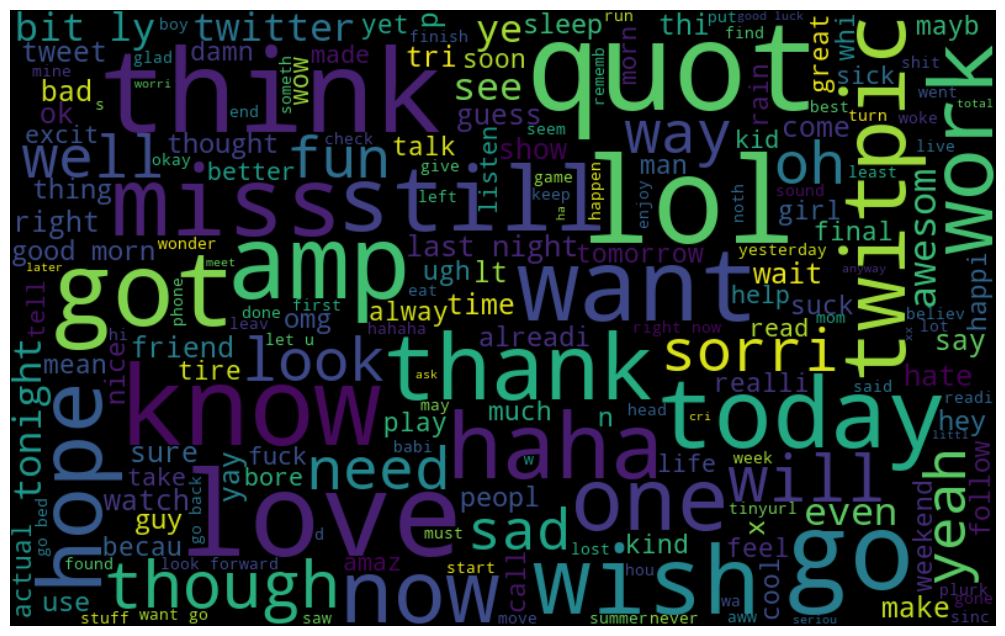

In [33]:
all_words = " ".join(sentence for sentence in df1['clean_text'])

wordcloud=WordCloud(width=800,height=500,random_state=42,max_font_size=100).generate(all_words)

plt.figure(figsize=(15,8))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

##### Visualise the frequent words for positive (i.e target=4)

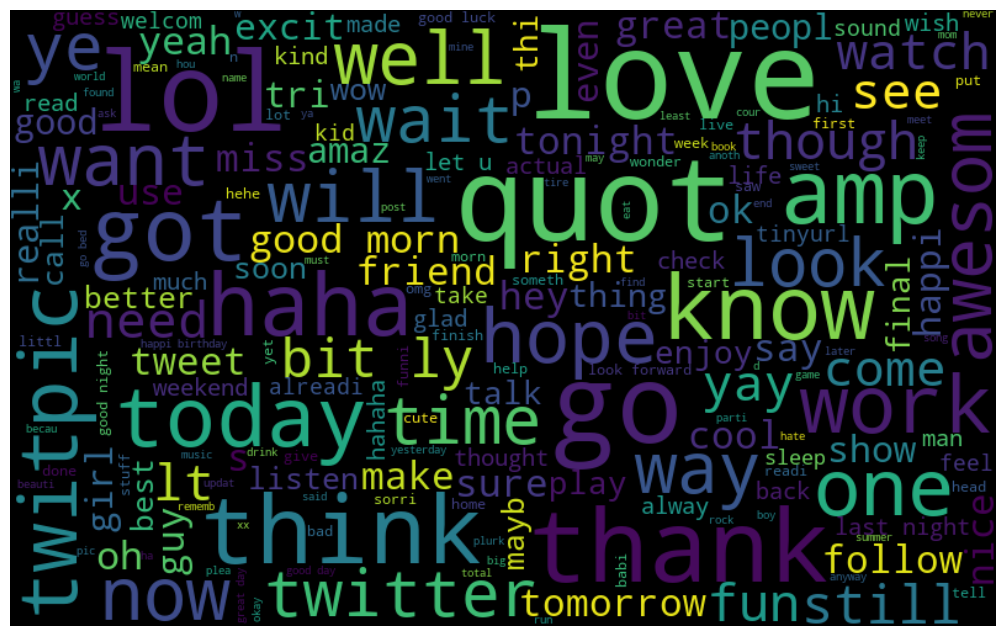

In [34]:
positive_words=" ".join(sentence for sentence in df1['clean_text'][df1['target']==4])

wordcloud=WordCloud(width=800,height=500,random_state=42,max_font_size=100).generate(positive_words)

plt.figure(figsize=(15,8))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

##### Visualise the frequent words for Negative (i.e target=0)

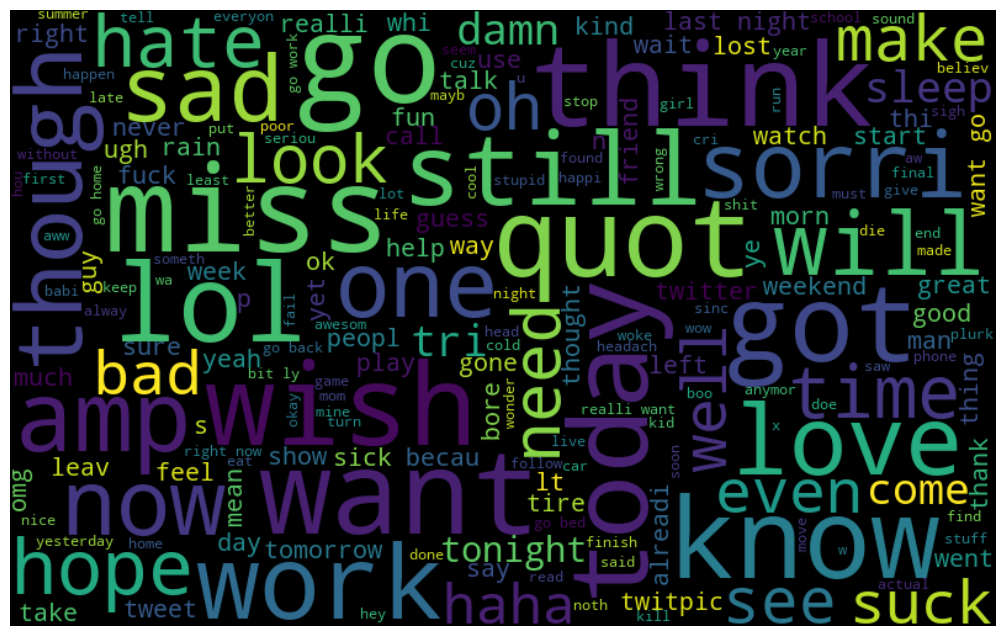

In [32]:
negative_words=" ".join(sentence for sentence in df1['clean_text'][df1['target']==0])

wordcloud=WordCloud(width=800,height=500,random_state=42,max_font_size=100).generate(negative_words)

plt.figure(figsize=(15,8))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

##### Estimating Correlation

In [35]:
def find_num_cat_columns(df):
    numerical_cols = df.select_dtypes(include=['float64', 'int64','int32']).columns.tolist()
    categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
    return numerical_cols, categorical_cols

In [36]:
numerical , categorical = find_num_cat_columns(df1)
print("Numerical Columns : " ,numerical , "\nCategorical Columns : " ,categorical)

Numerical Columns :  ['target', 'ids', 'special_char_count'] 
Categorical Columns :  ['date', 'flag', 'user', 'text', 'special_char', 'clean_text']


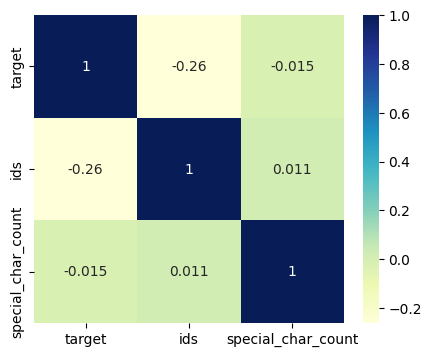

In [37]:
correlation_matrix = df1[numerical].corr()
fig = plt.figure(figsize = (5, 4))
sns.heatmap(correlation_matrix, cmap="YlGnBu",annot=True)
plt.show()

### Feature extraction

1. Count Vectorizer

In [38]:
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(stop_words='english',ngram_range = (1,3),tokenizer = token.tokenize)
text_counts = cv.fit_transform(df1['clean_text'])

In [39]:
Xtrain_cv,Xtest_cv,ytrain_cv,ytest_cv = train_test_split(text_counts,df1['target'],
                                                         random_state=42,test_size=0.3)

2. TfIdf Vectorizer

In [40]:
tfidfvectorizer = TfidfVectorizer(analyzer='word',stop_words= 'english')
tfidf = tfidfvectorizer.fit_transform(df1['clean_text'])

In [41]:
Xtrain_tfidf,Xtest_tfidf,ytrain_tfidf,ytest_tfidf = train_test_split(tfidf,df1['target'],
                                                                     random_state=42,test_size=0.3)

### Model Creation

##### Logistic Regression

Using CountVectorization dataset

In [42]:
model=LogisticRegression()
model.fit(Xtrain_cv,ytrain_cv)

y_pred=model.predict(Xtest_cv)
result = confusion_matrix(ytest_cv, y_pred)
print("Confusion Matrix:")
print(result)

class_report = classification_report(ytest_cv, y_pred)
print("Classification Report:",)
print (class_report)

accuracy = accuracy_score(ytest_cv,y_pred)
print("Accuracy:",accuracy)

print("Precision:",precision_score(ytest_cv,y_pred,pos_label=4))

# Here positive label is 4 in given dataset
print("F1_score:",f1_score(ytest_cv, y_pred, average="binary", pos_label=4)) 

print("ROC : ",roc_auc_score(ytest_cv,y_pred))


Confusion Matrix:
[[181728  57633]
 [ 48476 192163]]
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.76      0.77    239361
           4       0.77      0.80      0.78    240639

    accuracy                           0.78    480000
   macro avg       0.78      0.78      0.78    480000
weighted avg       0.78      0.78      0.78    480000

Accuracy: 0.7789395833333334
Precision: 0.7692797322615254
F1_score: 0.7836430923567852
ROC :  0.7788872231512126


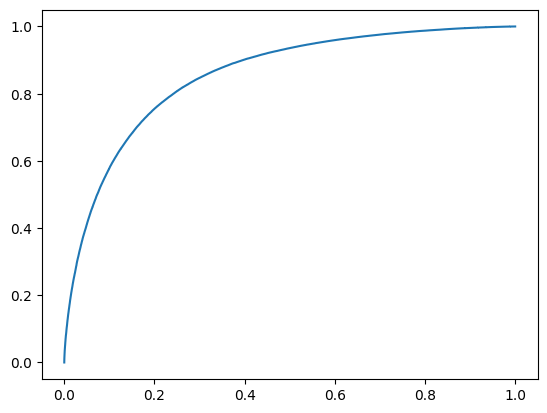

In [43]:
pred_prob=model.predict_proba(Xtest_cv)
fpr,tpr,thresh=roc_curve(ytest_cv,pred_prob[:,1],pos_label=4)
plt.plot(fpr,tpr)

Using TFIDFVectorization dataset

In [44]:
model=LogisticRegression()
model.fit(Xtrain_tfidf,ytrain_tfidf)

y_pred=model.predict(Xtest_tfidf)
result = confusion_matrix(ytest_tfidf, y_pred)
print("Confusion Matrix:")
print(result)

class_report = classification_report(ytest_tfidf, y_pred)
print("Classification Report:",)
print (class_report)

accuracy = accuracy_score(ytest_tfidf,y_pred)
print("Accuracy:",accuracy)

print("Precision:",precision_score(ytest_tfidf,y_pred,pos_label=4))

# Here positive label is 4 in given dataset
print("F1_score:",f1_score(ytest_tfidf, y_pred, average="binary", pos_label=4)) 

print("ROC : ",roc_auc_score(ytest_tfidf,y_pred))


Confusion Matrix:
[[177923  61438]
 [ 47297 193342]]
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.74      0.77    239361
           4       0.76      0.80      0.78    240639

    accuracy                           0.77    480000
   macro avg       0.77      0.77      0.77    480000
weighted avg       0.77      0.77      0.77    480000

Accuracy: 0.77346875
Precision: 0.7588586231258341
F1_score: 0.7805191161420938
ROC :  0.7733887052144011


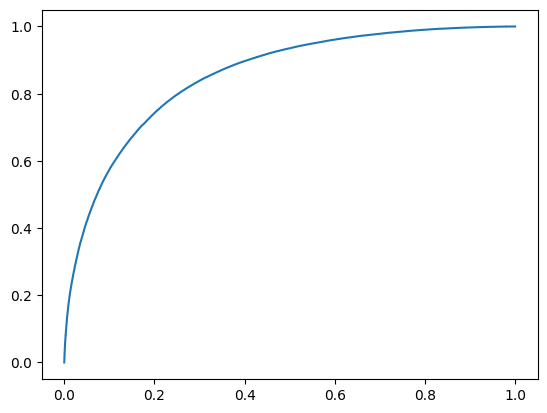

In [46]:
pred_prob=model.predict_proba(Xtest_tfidf)
fpr,tpr,thresh=roc_curve(ytest_tfidf,pred_prob[:,1],pos_label=4)
plt.plot(fpr,tpr)